# Regresión logística


<p style="display:none; ">https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-gauss&learningRate=0.003&regularizationRate=0&noise=15&networkShape=5,3&seed=0.04594&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false</p>
<a href="https://playground.tensorflow.org/">Tensorflow playground</p>

Utilizada para problemas de clasificación, especialmente cuando el objetivo es predecir una variable categórica binaria (con dos posibles valores, como 0 y 1).

<img src="../imgs/logistic_regression.png">

### Conceptos clave

#### Función sigmoide
La función sigmoide se utiliza para convertir cualquier valor real en un valor en el rango [0, 1]. Esto es esencial para interpretar los resultados como probabilidades.

Fórmula:

$ \sigma(z) = \frac{1}{1 + \exp{-z}} $

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Ejemplo de uso
z = np.array([0, 2, -2])
probabilidades = sigmoid(z)
print(probabilidades)  # Salida: [0.5, 0.88, 0.12]

[0.5        0.88079708 0.11920292]


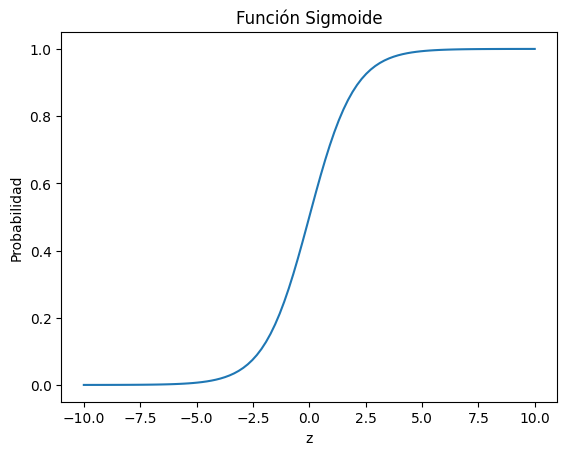

In [50]:
# Graficar la función sigmoide
z = np.linspace(-10, 10, 100)
probabilidades = sigmoid(z)
plt.plot(z, probabilidades)
plt.xlabel("z")
plt.ylabel("Probabilidad")
plt.title("Función Sigmoide")
plt.show()

#### Interpretación como probabilidad
La salida de la función sigmoide se interpreta como la probabilidad de que la clase objetivo sea 1. Para clasificar, se define un umbral (típicamente 0.5).

In [51]:
# Asumiendo que tenemos las probabilidades calculadas previamente
probabilidades = np.array([0.2, 0.7, 0.4, 0.9])

# Definir el umbral
umbral = 0.5

# Clasificación basada en el umbral
clasificaciones = (probabilidades >= umbral).astype(int)
print(clasificaciones)  # Salida: [0, 1, 0, 1]

[0 1 0 1]


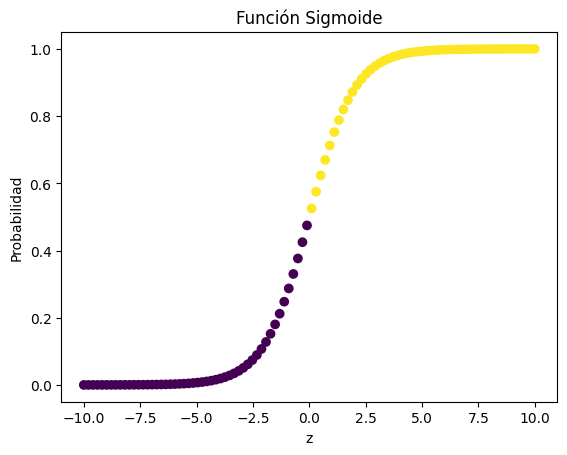

In [52]:
# Hacer una gráfica donde aparezcan diferentes valores marcados por el color de acuerdo a su clasificación
z = np.linspace(-10, 10, 100)
probabilidades = sigmoid(z)
clasificaciones = (probabilidades >= umbral).astype(int)
plt.scatter(z, probabilidades, c=clasificaciones)
plt.xlabel("z")
plt.ylabel("Probabilidad")
plt.title("Función Sigmoide")
plt.show()

#### Función de costo log loss (cross-entropy)
Se utiliza para medir el rendimiento del modelo: cuanto menor es la log loss, mejor es el modelo.

Fórmula:

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] $


In [53]:
def log_loss(y_true, y_pred):
    m = len(y_true)
    return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Ejemplo de uso
y_true = np.array([0, 1, 0, 1])
y_pred = np.array([0.1, 0.9, 0.4, 0.6])
costo = log_loss(y_true, y_pred)
print(costo)  # Salida: valor del costo

0.30809306971190853


<img src="../imgs/log_loss.png">

#### Modelo

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

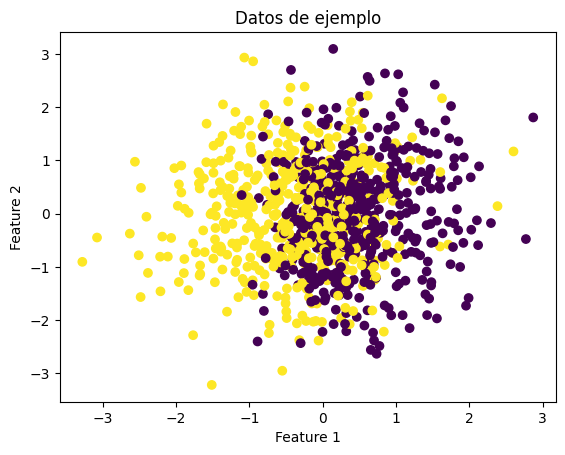

In [55]:
# Visualizamos los datos
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Datos de ejemplo")
plt.show()

In [56]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')  # Salida: precisión del modelo

Accuracy: 0.8466666666666667


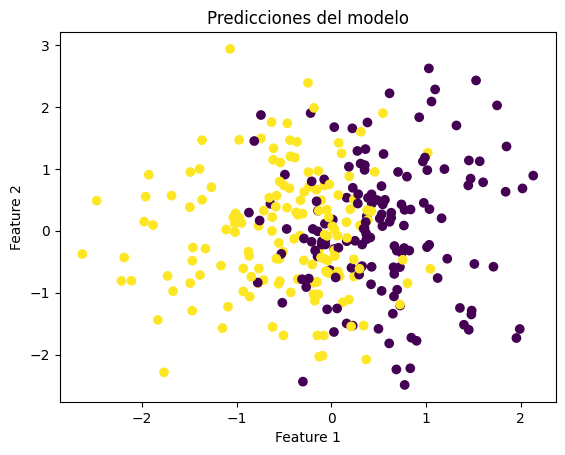

In [57]:
# Visualizar los resultados
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Predicciones del modelo")
plt.show()

#### Métricas de evaluación
Para evaluar el rendimiento de un modelo de clasificación, es importante utilizar varias métricas que proporcionen una visión completa de cómo está funcionando el modelo. Algunas métricas comunes son la precisión, la precisión, la exhaustividad y la F1-score.

###### Matriz de confusión
Matriz de Confusión:
La matriz de confusión es una herramienta que permite visualizar el rendimiento del modelo de clasificación, mostrando las predicciones correctas e incorrectas distribuidas en una tabla.

TP (True Positives): Verdaderos positivos.
TN (True Negatives): Verdaderos negativos.
FP (False Positives): Falsos positivos.
FN (False Negatives): Falsos negativos.

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

$F1\text{-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

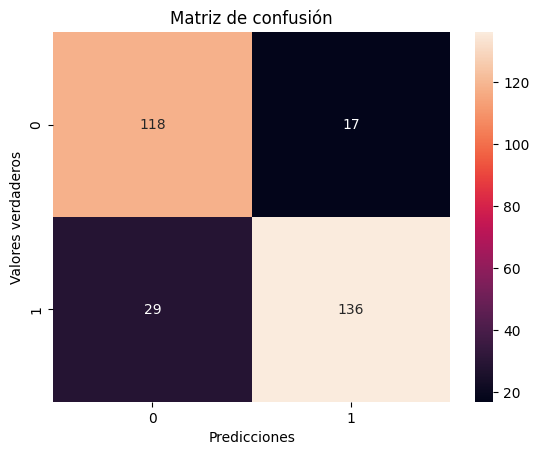

In [58]:
# Veamos la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusion, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de confusión')
plt.show()

In [59]:
# Calcular todas las métricas de clasificación
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precisión
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f'Precisión: {precision}')

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1: {f1}')

Accuracy: 0.8466666666666667
Precisión: 0.8888888888888888
Recall: 0.8242424242424242
F1: 0.8553459119496856


In [60]:
import pandas as pd

# Cargamos los datos
data = pd.read_csv("../data/heart_failure.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


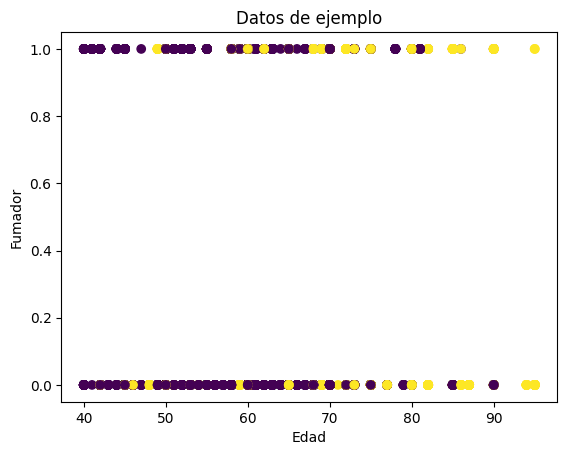

In [62]:
# Vemos la relación entre edad, presión arterial y si falleció o no
plt.scatter(data.age, data.smoking, c=data.DEATH_EVENT)
plt.xlabel("Edad")
plt.ylabel("Fumador")
plt.title("Datos de ejemplo")
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data.drop(columns=["DEATH_EVENT"])
y = data["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\revol\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

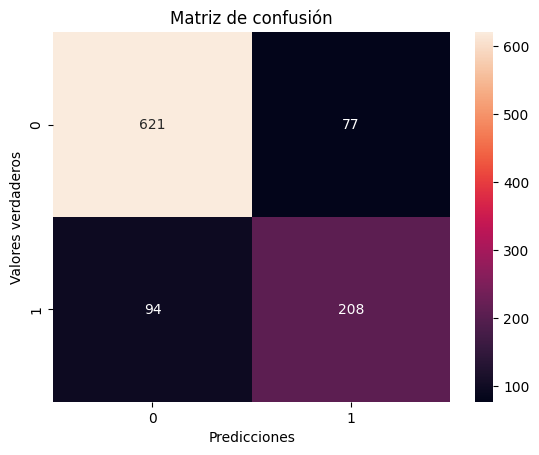

In [65]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo con matrices de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusion, annot=True, fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de confusión')
plt.show()